In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv("./BankCustomerChurnPrediction.csv")
data.head()
data.shape

(10000, 12)

In [8]:
data = data.drop(columns=["customer_id", "gender", "country"])

x = data.drop(columns=["churn"])
y = data["churn"]

In [9]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005), input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


c:\Github\deep-learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7902 - loss: 0.9383 - val_accuracy: 0.8150 - val_loss: 0.6947
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8047 - loss: 0.6277 - val_accuracy: 0.8315 - val_loss: 0.5455
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8143 - loss: 0.5348 - val_accuracy: 0.8260 - val_loss: 0.4847
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8200 - loss: 0.4852 - val_accuracy: 0.8505 - val_loss: 0.4480
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8350 - loss: 0.4564 - val_accuracy: 0.8550 - val_loss: 0.4260
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.4441 - val_accuracy: 0.8580 - val_loss: 0.4176
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8427 - loss: 0.4267 - val_accuracy: 0.8615 - val_loss: 0.4087
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8405 - loss: 0.4226 - val_accu

In [13]:
predictions = model.predict(x_test[:5])
print(predictions)

for p in predictions:
    if p >= 0.5:
        print(1)
    else:
        print(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.2578007 ]
 [0.21730028]
 [0.01885144]
 [0.03970724]
 [0.09011782]]
0
0
0
0
0


In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8565 - loss: 0.3883
0.38832321763038635 0.8565000295639038


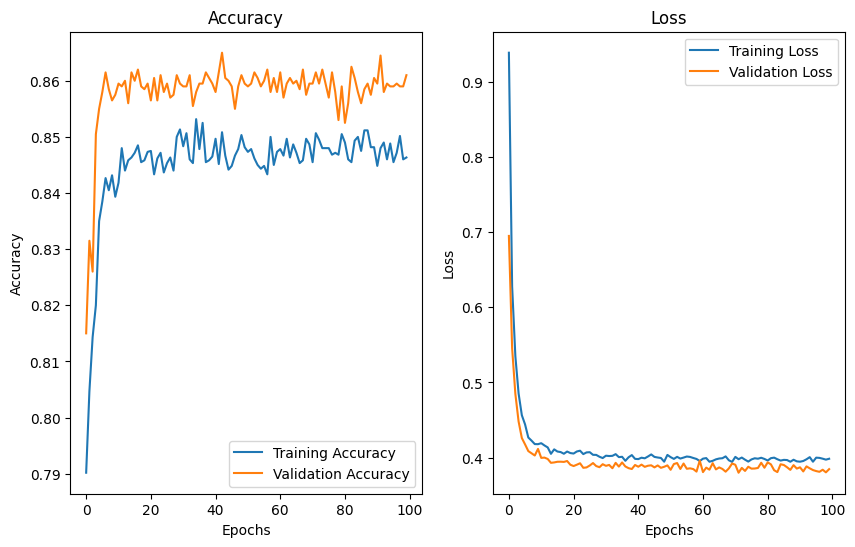

In [15]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()